## DS 121 Final Project

### 1. Introduction: Provide an easy-to-understand summary of what you’ve done and why it matters to you. This section should be understandable even by people who have not taken this course.

In this project, I examine a dataset from Kaggle titled "GDP by County". My goal is to find common trends about GDP in different regions, states, and counties in the US using this dataset. Furthermore I want to examine the data from the counties with the highest GDP and use linear regression to find a trendline to determine counties with the highest GDP growth rate. I will compare my findings with what I know about different cities and economies in the US to analyze how different areas of the US are doing economically and each counties growth. 

### 2. Data: Describe the dataset you have studied. Explain what the objects and features are, show some samples, etc. If appropriate, describe where the dataset comes from and where it is applied in practice.

This dataset contains data between the years of 2001 and 2018 for every US county and it's GDP. The objects of the dataset is each row containing the data for the features of each county, while the features of the dataset are the index of the county, the year, the county FIPS (Federal Information Processing Standard Publication Number), the region, subregion, and state in which the county is located, the state's abbreviation, the county and the county's full name, and finally the GDP of the county during that year. The dataset comes from Kaggle, which is an online resource which holds many datasets available for public use. This dataset can be used to analyze GDP around the nation, which is an indicator of many economic factors and therefore provides important insight on each county across the nation. 

In [ ]:
import pandas as pd
import numpy as np

from google.colab import files
uploaded = files.upload()

Saving GDP by County.csv to GDP by County (2).csv


In [ ]:
data = pd.DataFrame(pd.read_csv('GDP by County.csv'))
data

,index,Year,County FIPS,Region,SUB_REGION,State,STATE_ABBR,County,County Full Name,GDP (Chained $)
0,0,2001,1001,Southeast,East South Central,Alabama,AL,Autauga,Autauga County,954588000
1,1,2001,1003,Southeast,East South Central,Alabama,AL,Baldwin,Baldwin County,3929753000
2,2,2001,1005,Southeast,East South Central,Alabama,AL,Barbour,Barbour County,813278000
3,3,2001,1007,Southeast,East South Central,Alabama,AL,Bibb,Bibb County,292693000
4,4,2001,1009,Southeast,East South Central,Alabama,AL,Blount,Blount County,810381000
...,...,...,...,...,...,...,...,...,...,...
55558,55558,2018,56037,Rocky Mountain,Mountain,Wyoming,WY,Sweetwater,Sweetwater County,3836603000
55559,55559,2018,56039,Rocky Mountain,Mountain,Wyoming,WY,Teton,Teton County,2166420000
55560,55560,2018,56041,Rocky Mountain,Mountain,Wyoming,WY,Uinta,Uinta County,906587000
55561,55561,2018,56043,Rocky Mountain,Mountain,Wyoming,WY,Washakie,Washakie County,358104000


In [ ]:
data = data.drop(['County FIPS'], axis=1)
data = data.drop(['STATE_ABBR'], axis=1)
data = data.drop(['County'], axis=1)
data      # display the data table and it's relevant columns

,index,Year,Region,SUB_REGION,State,County Full Name,GDP (Chained $)
0,0,2001,Southeast,East South Central,Alabama,Autauga County,954588000
1,1,2001,Southeast,East South Central,Alabama,Baldwin County,3929753000
2,2,2001,Southeast,East South Central,Alabama,Barbour County,813278000
3,3,2001,Southeast,East South Central,Alabama,Bibb County,292693000
4,4,2001,Southeast,East South Central,Alabama,Blount County,810381000
...,...,...,...,...,...,...,...
55558,55558,2018,Rocky Mountain,Mountain,Wyoming,Sweetwater County,3836603000
55559,55559,2018,Rocky Mountain,Mountain,Wyoming,Teton County,2166420000
55560,55560,2018,Rocky Mountain,Mountain,Wyoming,Uinta County,906587000
55561,55561,2018,Rocky Mountain,Mountain,Wyoming,Washakie County,358104000


Text(0.5, 1.0, 'GDP of all Counties')

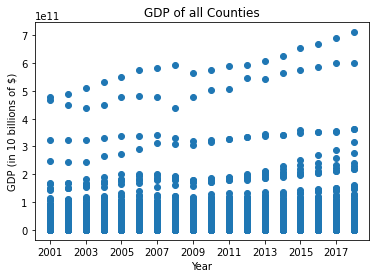

In [ ]:
# scatterplot for all data across all counties and all years

import matplotlib.pyplot as plt
plt.scatter(data['Year'],  data['GDP (Chained $)'])
plt.xlabel('Year')
plt.ylabel('GDP (in 10 billions of $)')
plt.xticks(np.arange(2001, 2019, step=2))
plt.title('GDP of all Counties')

Text(0.5, 1.0, 'GDP by Region')

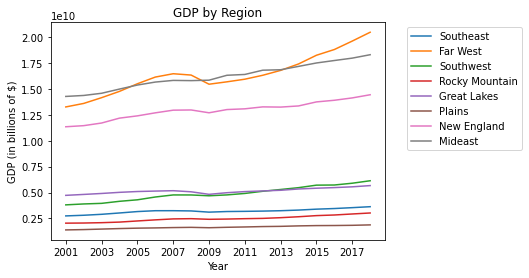

In [ ]:
# line plot of each region's average GDP for each year

import matplotlib.pyplot as plt
import numpy as np

years = np.arange(2001, 2019)
regions = data['Region'].unique()
for i in regions:
  means = []
  region_data = data.loc[data['Region'] == i]
  for j in years:
    region_data_mean = region_data.loc[data['Year'] == j]
    means = np.append(means, np.mean(region_data_mean['GDP (Chained $)']))
  plt.plot(years, means, label=i)
  plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

plt.xlabel('Year')
plt.ylabel('GDP (in billions of $)')
plt.xticks(np.arange(2001, 2019, step=2))  
plt.title('GDP by Region')

### 3. Methodology: Here, you should state the analysis techniques that you used in the project. Make sure to explain what the algorithm you’re using does, and why you chose this particular strategy for analyzing the data. If appropriate, state a hypothesis that you plan to test.

In this project, I used several analysis techniques to sort, analyze, and regress my data. First, I used the .drop function of Pandas to get rid of columns that did not hold useful data for what I am interested in analyzing. I also used .loc for indexing certain columns of the data, and .sort_values to sort the data by specific columns, for example in order of descending GDP. In addition I used numpy's .mean function to find the mean GDP each year for each region. Using matplotlib, I was able to create scatterplots and line plots to display the data and trendlines and with different labels and different colors, as well as adding in x ticks, y ticks, axis titles, and a graph title. The algorithm used for finding the trend line and error was linear regression. I applied linear regression to the top 5 states from 2018 using scipy.stats.linregress. This function performs linear regression on a specified x and y (year and GDP) to get the slope and intercept of the trend line for each county. Then, using the slope I can conclude which counties have the highest growth rate. Using my knowledge about major US cities and economies in the US, I hypothesize the the major cities like Los Angeles, New York, Chicago, and Boston will have the highest GDPs, and areas like the Silicon Valley and Austin, Texas, areas with lots of large, growing technology companies, will have the fastest growing GDPs. 

### 4. Analysis: Show the analysis itself, and include any charts/graphs/tables that help to visualize what you’ve done. This section should contain the code for implementing your methodology. For example, a project using matrix factorizations could include an implementation of one or more of the factorizations we discussed in class (or a related one).

In [ ]:
# data for top 10 counties

top_counties = data.loc[data['Year'] == 2018].sort_values('GDP (Chained $)', ascending=False).head(10)
top_counties[['County Full Name', 'State', 'Region', 'GDP (Chained $)']]

,County Full Name,State,Region,GDP (Chained $)
52358,Los Angeles County,California,Far West,710893266000
52805,New York County,New York,Mideast,600244287000
44953,Cook County,Illinois,Great Lakes,362063569000
54111,Harris County,Texas,Southwest,361353488000
52382,Santa Clara County,California,Far West,316525538000
55372,King County,Washington,Far West,277122158000
54067,Dallas County,Texas,Southwest,241375801000
52369,Orange County,California,Far West,230145536000
52257,Maricopa County,Arizona,Southwest,220789933000
52376,San Diego County,California,Far West,219361505000


['California' 'New York' 'Illinois' 'Texas' 'California' 'Washington'
 'Texas' 'California' 'Arizona' 'California']


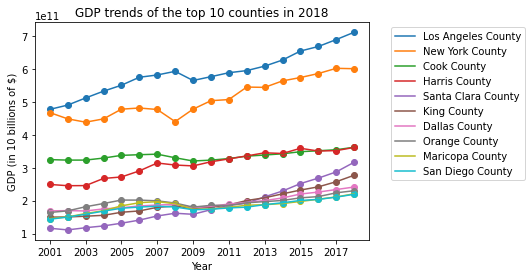

In [ ]:
# top 10 counties in 2018 and their GDPs over the years 2001 through 2018

years = np.arange(2001, 2019)
counties = np.array(top_counties['County Full Name'])
states = np.array(top_counties['State'])
for i in np.arange(0,10):
  county_gdps = []
  county_data = data.loc[data['County Full Name'] == counties[i]]
  county_data = county_data.loc[data['State'] == states[i]]
  for j in years:
    gdp = county_data.loc[county_data['Year'] == j]
    county_gdps = np.append(county_gdps, gdp['GDP (Chained $)'])
  plt.scatter(years, county_gdps)
  plt.plot(years, county_gdps, label=counties[i])
  plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

plt.xlabel('Year')
plt.ylabel('GDP (in 10 billions of $)')
plt.xticks(np.arange(2001, 2019, step=2))  
plt.title('GDP trends of the top 10 counties in 2018')
print(states)

Slopes:
 [1.16807620e+10 9.94572109e+09 1.74559053e+09 7.30123283e+09
 1.14197841e+10]


<ipython-input-83-611a0b3ef112>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_five_counties['Rate of GDP Growth'] = slopes
<ipython-input-83-611a0b3ef112>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_five_counties['Standard Error'] = error


,index,Year,Region,SUB_REGION,State,County Full Name,GDP (Chained $),Rate of GDP Growth,Standard Error
52358,52358,2018,Far West,Pacific,California,Los Angeles County,710893266000,1.168076e+10,8.087991e+08
52805,52805,2018,Mideast,Middle Atlantic,New York,New York County,600244287000,9.945721e+09,9.663333e+08
44953,44953,2018,Great Lakes,East North Central,Illinois,Cook County,362063569000,1.745591e+09,3.685563e+08
54111,54111,2018,Southwest,West South Central,Texas,Harris County,361353488000,7.301233e+09,4.592203e+08
52382,52382,2018,Far West,Pacific,California,Santa Clara County,316525538000,1.141978e+10,7.481855e+08


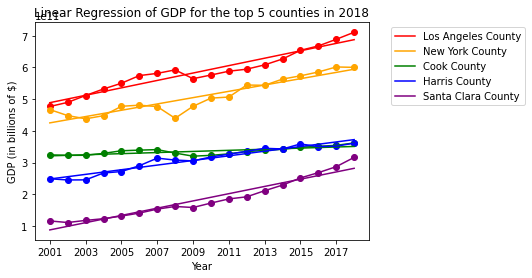

In [ ]:
# Linear Regression of the top 5 counties in 2018

from scipy.stats import linregress

colors = ['red', 'orange', 'green', 'blue', 'purple', 'pink']
counties = counties[0:5]
states = states[0:5]
slopes = []
error = []

for i in np.arange(0,5):

  county_gdps = []
  county_data = data.loc[data['County Full Name'] == counties[i]]
  county_data = county_data.loc[county_data['State'] == states[i]]

  for j in years:
    gdp = county_data.loc[county_data['Year'] == j]
    county_gdps = np.append(county_gdps, gdp['GDP (Chained $)'])

  plt.scatter(years, county_gdps, color=colors[i])
  plt.plot(years, county_gdps, color=colors[i])

  x = years
  y = county_gdps
  (slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
  slopes = np.append(slopes, slope)
  error = np.append(error, stderr)

  y_pred = (intercept + (slope*x))
  plt.plot(x, y_pred, color=colors[i], label=counties[i])
  plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

plt.xlabel('Year')
plt.ylabel('GDP (in billions of $)')
plt.xticks(np.arange(2001, 2019, step=2))  
plt.title('Linear Regression of GDP for the top 5 counties in 2018')

print('Slopes:\n', slopes)
top_five_counties = top_counties.head(5)
top_five_counties['Rate of GDP Growth'] = slopes
top_five_counties['Standard Error'] = error
top_five_counties

### 5. Results: Explain the takeaways from your analysis. For example, does your analysis support or refute the claim you were intending to study, and did your algorithm behave as expected? If your project is building upon someone else’s work, make sure to use this space to compare and contrast your findings with other works.

The main takaways from my analysis are that regions with the highest GDP in the most recent year with data available from this table are the Far West, Mid East, and New England. The states with the higest GDP are California, New York, Illinois, Texas, and Washington. The counties with the highest GDP are Los Angeles, New York, Cook, Harris, and Santa Clara. Of these, the fastest growing counties are Los Angeles, Santa Clara, New York, Harris, then Cook. This confirms my hypothesis that the fastest growing counties in terms of GDP would be the areas in which large tech companies are located, since economically speaking these hold the most money and value and contribute the most to GDP. The algorithm of linear regression behaved as expected when used, drawing a common trendline through the points for each county. 

### 6. Conclusion: Summarize the work you’ve done and the outcomes you’ve discovered.

In this project, I have used my knowledge learned from the semester in DS 121 to read a csv, load a dataset, clean and sort the dataset, find statistical measures in the data like the mean, display the data using scatter plots and line plots, and perform linear regression on the data and find the error for the regression. I've discovered the counties, states, and regions with the highest GDP and the fastest growing GDP, and the results align with my hypotheses formed around the economics in the US. 

### 7. References: I’ll repeat, make sure to cite your work! You can use any textbook, website, paper, or other resource as long as you cite it. Using prior work without citing it is plagiarism and will be handled as stated in the course syllabus.

Dataset: Charlie Hutcheson (Kaggle), "The U.S. Counties With the Highest GDP and How Much They Contribute to the National Economy". https://www.kaggle.com/datasets/thedevastator/the-u-s-counties-with-the-highest-gdp?resource=download 

Relevant Article: Makada Henry-Nickie, Kwadwo Frimpong, and Hao Sun. "Trends in the Information Technology Sector". Published March 29, 2019. https://www.brookings.edu/research/trends-in-the-information-technology-sector/ 

Data Processing Techniques:
- Pandas Documentation. Author: Pandas via NumFOCUS, Inc. "User Guide". https://www.brookings.edu/research/trends-in-the-information-technology-sector/ 
- Numpy Documentation. Author: NumPy. "Numpy Documentation". https://numpy.org/doc/stable/ 
- Scipy Documentation. Author: The SciPy community. "scipy.stats.linregress". https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html 
- Matplotlib Documentaton. Author: John Hunter, Darren Dale, Eric Firing, Michael Droettboom and the Matplotlib development team. "Matplotlib 3.6.3 Documentation - Quick Start Guide". https://matplotlib.org/stable/index.html 